In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [112]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [113]:
df.drop_duplicates(inplace=True)
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [114]:
df._get_numeric_data().skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

In [115]:
df._get_numeric_data().corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [ ]:
# ! pip install Autoviz
# ! pip install xlrd

Imported AutoViz_Class version: 0.0.85. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (1338, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    7 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 3


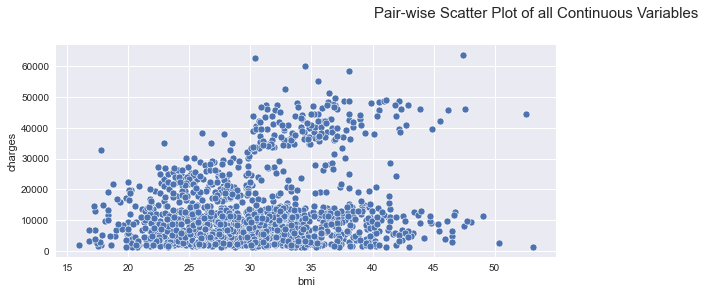

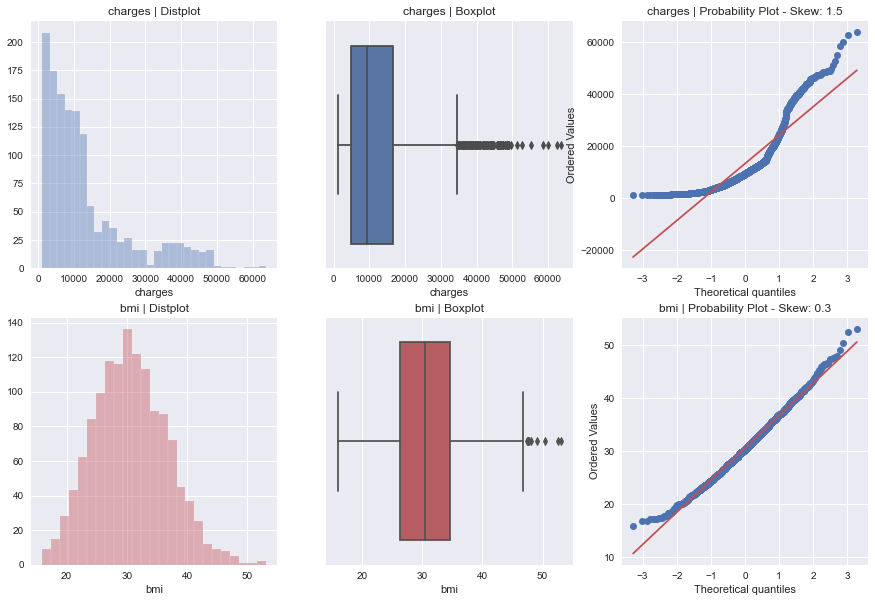

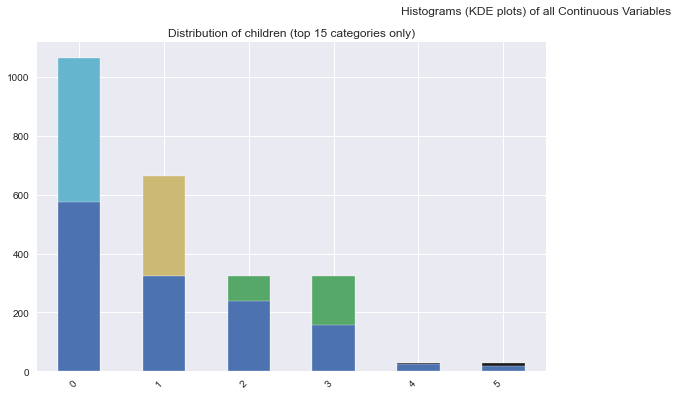

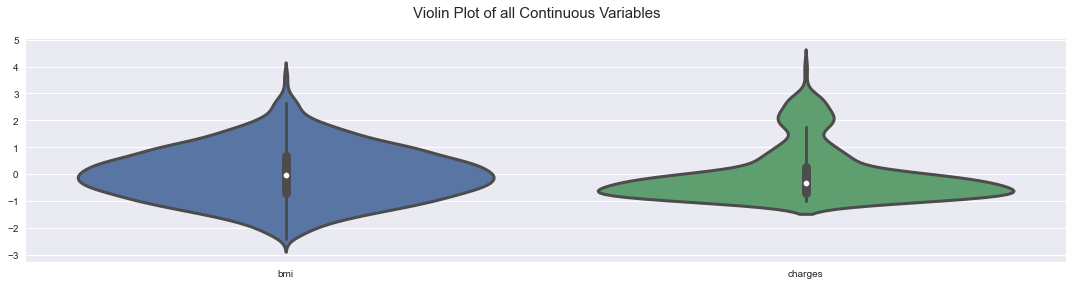

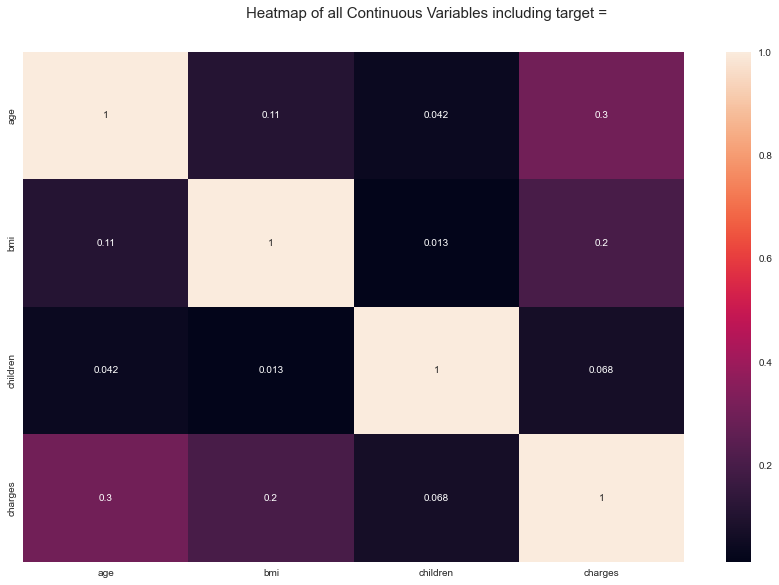

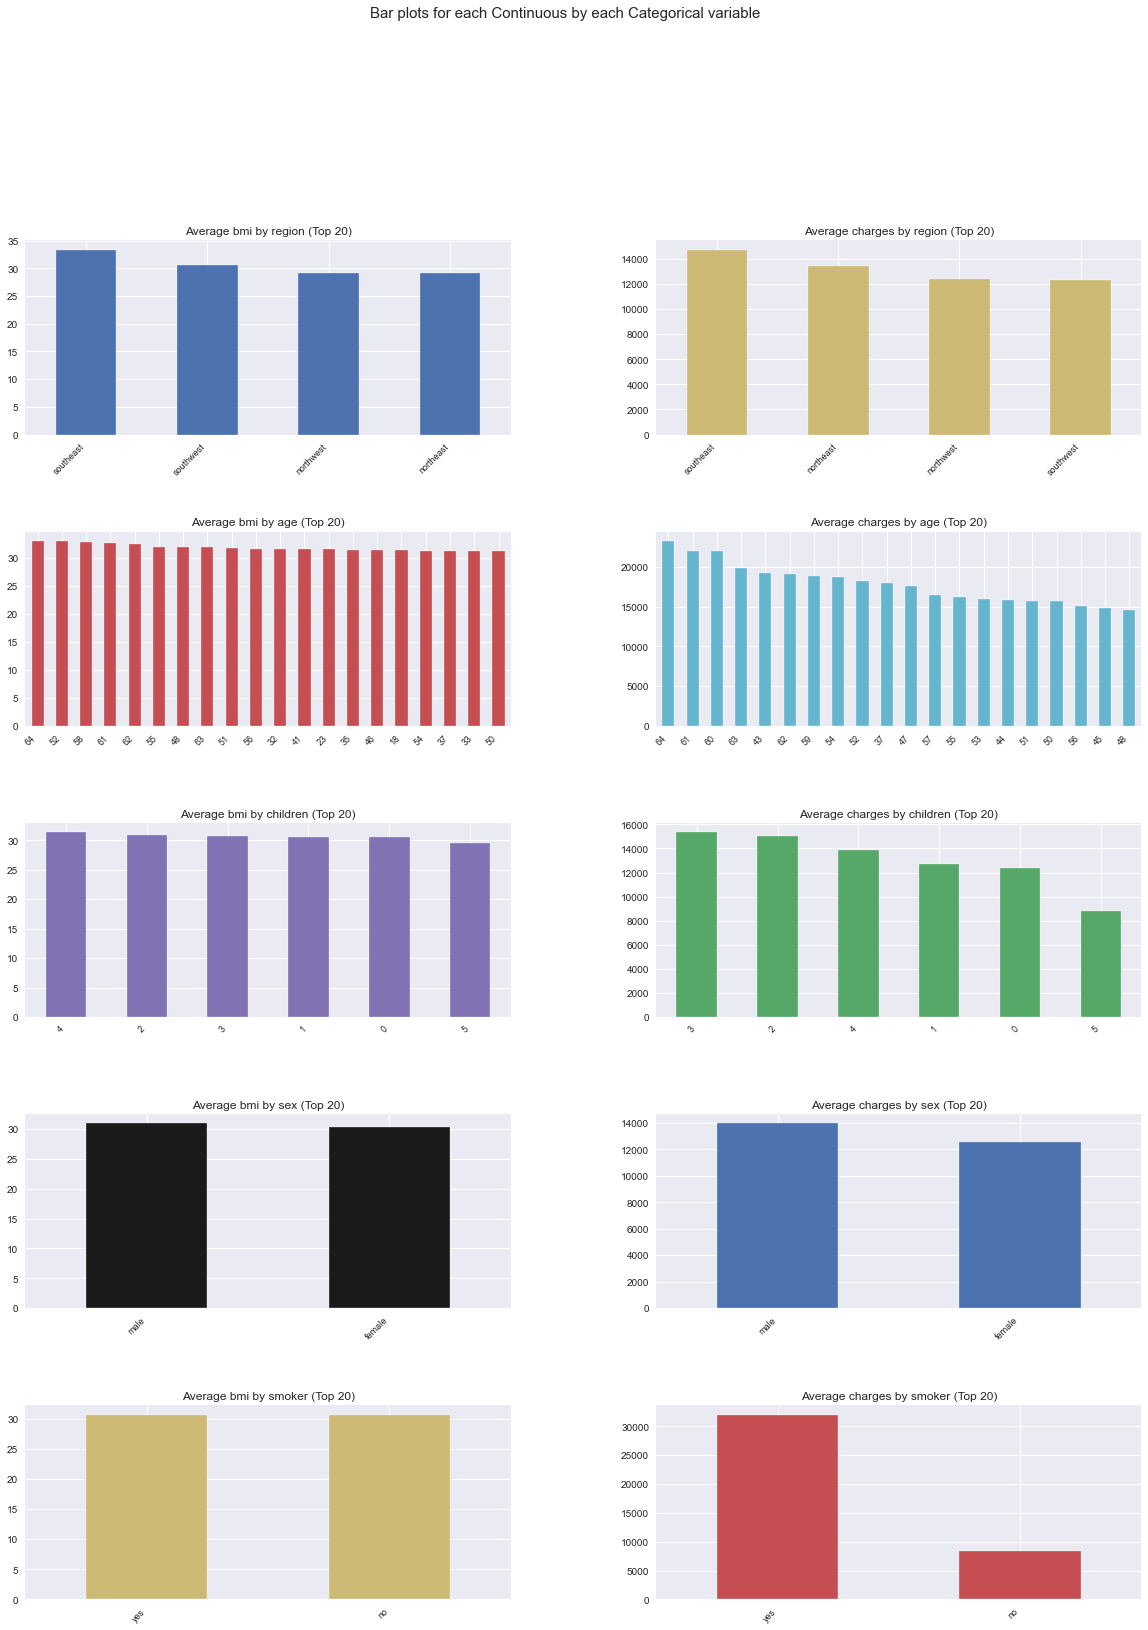

Time to run AutoViz (in seconds) = 1

 ###################### VISUALIZATION Completed ########################


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [116]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AV.AutoViz('insurance.csv')

Data Preprocessing

In [117]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
numeric_cols = df._get_numeric_data()
categoric_col = df.select_dtypes(include='object')
categoric_features = pd.get_dummies(categoric_col)

In [119]:
numeric_features = numeric_cols[['age', 'bmi', 'children']]
features = pd.merge(numeric_features, categoric_features, left_index=True, right_index=True)
predictor = numeric_cols['charges']

In [120]:
X_train,X_test,y_train,y_test = train_test_split(features
                                                ,predictor
                                                ,test_size = 0.3
                                                ,random_state=44)

In [121]:
poly = PolynomialFeatures(degree=2)
lr = LinearRegression()

In [122]:
lr = LinearRegression()
def model_test(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    lr.fit(X_poly,y_train)
    X_test_poly = poly.fit_transform(X_test)
    Y_pred = lr.predict(X_test_poly)
    r2 = r2_score(y_test,Y_pred)
    mse = np.sqrt(mean_squared_error(y_test,Y_pred))
    output = [degree, r2 , mse]
    return pd.Series(output, index=['degree','r2','mse'])

In [123]:
compare = pd.DataFrame(columns=['degree','r2','mse'])
for degree in range(1, 10):
    temp = model_test(degree)
    compare = compare.append(temp.T, ignore_index=True)

In [124]:
pd.options.display.float_format = '{:.5f}'.format

In [125]:
compare

,degree,r2,mse
0,1.00000,0.79174,5565.64842
1,2.00000,0.84830,4750.17992
2,3.00000,0.86144,4539.77944
3,4.00000,0.68883,6803.17511
4,5.00000,-26.17523,63577.15249
5,6.00000,-699167.04215,10197770.39176
6,7.00000,-9089447.52466,36769117.97301
7,8.00000,-9158240.40627,36907997.99411
8,9.00000,-17981799.26299,51716726.71329


Comparing different models shows, a degree of 3 is best thus far!

In [126]:
model_test(degree=3)

degree      3.00000
r2          0.86144
mse      4539.77944
dtype: float64

In [127]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)

In [128]:
# Load from file
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [131]:
def transform(input):
    numeric_features = input[['age', 'bmi', 'children']]
    categoric_col = input[['sex', 'smoker', 'region']]
    categoric_features = pd.get_dummies(categoric_col)
    features = pd.merge(numeric_features, categoric_features, left_index=True, right_index=True)
    features = features.reindex(labels=col,axis=1).fillna(0)
    poly = PolynomialFeatures(degree=3)
    input_transform = poly.fit_transform(features)
    return input_transform

def prediction(model, input_df):
    input_transform = transform(input_df)
    output = input_df.copy()
    output['Prediction'] = model.predict(input_transform).tolist()
    return output

Testing to make sure different inputs don't break the model

In [134]:
prediction(pickle_model, df.head(1))

,age,sex,bmi,children,smoker,region,charges,Prediction
0,19,female,27.90000,0,yes,southwest,16884.92400,25751.75302


In [133]:
prediction(pickle_model, df.head(10))

,age,sex,bmi,children,smoker,region,charges,Prediction
0,19,female,27.90000,0,yes,southwest,16884.92400,25751.75302
1,18,male,33.77000,1,no,southeast,1725.55230,4444.45087
2,28,male,33.00000,3,no,southeast,4449.46200,6434.77582
3,33,male,22.70500,0,no,northwest,21984.47061,3543.39694
4,32,male,28.88000,0,no,northwest,3866.85520,3581.59231
5,31,female,25.74000,0,no,southeast,3756.62160,5514.55072
6,46,female,33.44000,1,no,southeast,8240.58960,10398.62178
7,37,female,27.74000,3,no,northwest,7281.50560,7443.94176
8,37,male,29.83000,2,no,northeast,6406.41070,9753.39346
9,60,female,25.84000,0,no,northwest,28923.13692,12434.61312
